In [1]:
#Required Libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
#Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



In [29]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [30]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
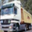

In [31]:
X_train[1]

In [32]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [33]:
X_train,X_test=X_train/255 , X_test/255
Y_train=Y_train.reshape(-1,)

In [41]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

In [34]:
Cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #makes it 1D
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
Cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',#Sparse returns index instead of binary
              metrics=['accuracy'])

In [36]:
Cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 57ms/step - accuracy: 0.2554 - loss: 1.9577
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.4776 - loss: 1.4434
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.5452 - loss: 1.2946
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 62ms/step - accuracy: 0.5764 - loss: 1.1997
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 56ms/step - accuracy: 0.6109 - loss: 1.1127
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 64ms/step - accuracy: 0.6364 - loss: 1.0361
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.6541 - loss: 0.9876
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 56ms/step - accuracy: 0.6703 - loss: 0.9385
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 57ms/step - accuracy: 0.6855 - loss: 0.8945
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 55ms/step - accuracy: 0.7021 - loss: 0.8608


In [37]:
Cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6916 - loss: 0.8876


[0.8952761888504028, 0.6880000233650208]

In [38]:
Y_test=Y_test.reshape(-1,)

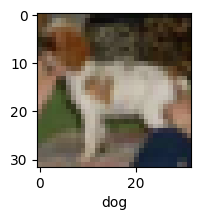

In [42]:
plot_sample(X_test,Y_test,12)

In [43]:
y_pred=Cnn.predict(X_test)
y_class=[np.argmax(element) for element in y_pred]


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [44]:
y_class[:5]

[3, 8, 8, 0, 4]

In [45]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [47]:
print("Confusion Matrix:\n", classification_report(Y_test, y_class))

Confusion Matrix:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.84      0.84      0.84      1000
           2       0.49      0.67      0.56      1000
           3       0.52      0.46      0.49      1000
           4       0.60      0.62      0.61      1000
           5       0.64      0.52      0.57      1000
           6       0.77      0.76      0.76      1000
           7       0.77      0.70      0.73      1000
           8       0.79      0.81      0.80      1000
           9       0.78      0.79      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

